In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [9]:
raw_data = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv')
raw_data.head()

,id,keyword,location,text,target
0,1,earthquake,us,Our Deeds are the Reason of this #earthquake M...,1
1,4,fire,la,Forest fire near La Ronge Sask. Canada,1
2,5,evacuation,unknown,All residents asked to 'shelter in place' are ...,1
3,6,evacuation,california,"13,000 people receive #wildfires evacuation or...",1
4,7,smoke,alaska,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
raw_data.groupby('location').agg({'target':['count','sum']})[('target','sum')].nlargest(10) #Top ten ubicaciones con mas tweets verdaderos

location
unknown          545
usa               70
california        51
india             31
united states     29
nigeria           28
japan             24
world             23
us                22
mumbai            21
Name: (target, sum), dtype: int64

In [15]:
data_grouped_location = raw_data.groupby('location').agg({'target':['mean','count','sum']})
data_grouped_location.columns = ['target_mean','target_count','target_sum']
data_grouped_location.sort_values(by='target_sum',ascending=False)

,target_mean,target_count,target_sum
location,,,
unknown,0.32,1680,545
usa,0.63,111,70
california,0.80,64,51
india,0.82,38,31
united states,0.55,53,29
...,...,...,...
"irving , texas",0.00,1,0
"island lake, il",0.00,1,0
it's a journey,0.00,1,0


In [16]:
data_grouped_location = data_grouped_location.drop(data_grouped_location[data_grouped_location['target_count'] < 10].index)
droped['target_count'].nsmallest(10)

location
china              10
dallas, tx         10
hell               10
london, england    10
london, uk         10
new york city      10
sacramento, ca     10
scotland           10
ss                 10
turkey             10
Name: target_count, dtype: int64

Text(0, 0.5, 'Truth percentege')

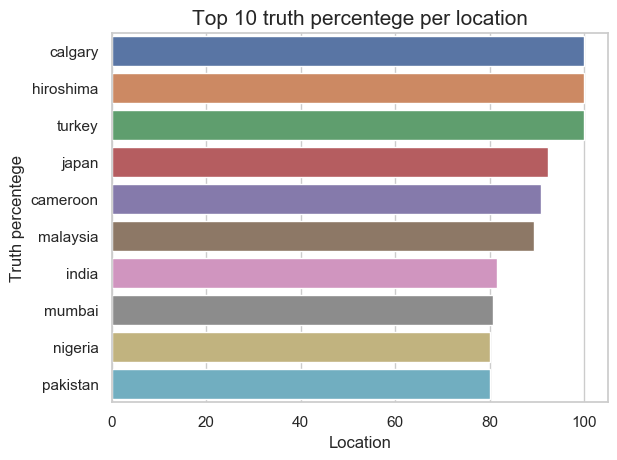

In [21]:
ax = sns.barplot(x=data_grouped_location['target_mean'].nlargest(10) * 100,y=data_grouped_location['target_mean'].nlargest(10).index,orient='h')
ax.set_title("Top 10 truth percentege per location", fontsize = 15)
ax.set_xlabel("Location", fontsize = 12)
ax.set_ylabel("Truth percentege", fontsize = 12)

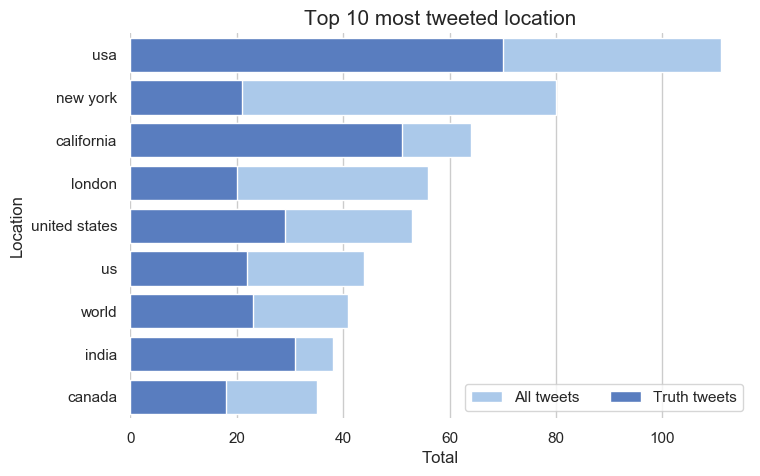

In [56]:
index_most_tweeted = data_grouped_location['target_count'].nlargest(10).index
index_most_tweeted = index_most_tweeted.drop('unknown') #Ya que en la limpieza de datos determinamos que son valores desconocidos
f, ax = plt.subplots(figsize=(8, 5))

sns.set_color_codes("pastel")
sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_count'], y=index_most_tweeted,
            label="All tweets", color="b")

sns.set_color_codes("muted")
sns.barplot(x=data_grouped_location.loc[index_most_tweeted,'target_sum'], y=index_most_tweeted,
            label="Truth tweets", color="b")

# Add a legend and informative axis label
ax.set_title("Top 10 most tweeted location", fontsize = 15)
ax.set_ylabel("Location", fontsize = 12)
# ax.set_xlabel("Truth percentege", fontsize = 12)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Location",xlabel="Total")
sns.despine(left=True, bottom=True)

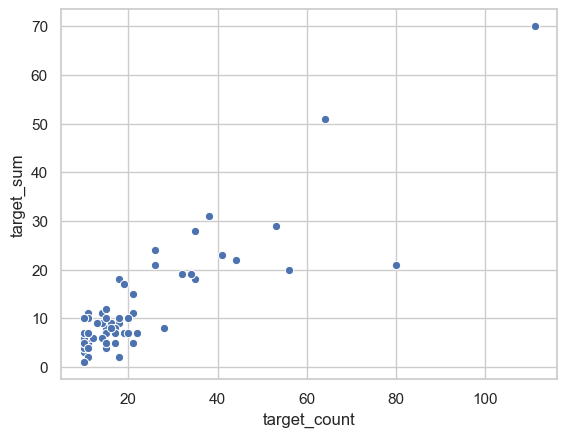

In [68]:
# no pareciera haber relacion entre la cantidad de veces mencionada con su verdad
data_grouped_location = data_grouped_location.drop(data_grouped_location.loc[data_grouped_location.index == 'unknown'].index)
sns.scatterplot(x=data_grouped_location['target_count'],y=data_grouped_location['target_sum'])

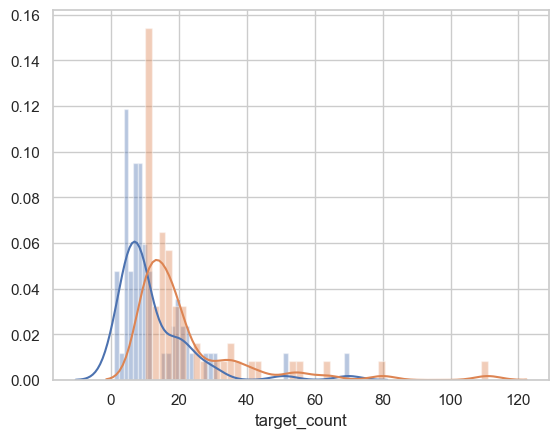

In [67]:
# distribucion de locations verdaderas vs distribucion de location falsas
g = sns.distplot(data_grouped_location['target_sum'],bins=50,hist=True) #tweets verdaderos por location
g = sns.distplot(data_grouped_location['target_count'],bins=50,hist=True) #tweets por location

In [8]:
#Getting the data for location-keyword relationshp analysis
twitterKeywordAndLocation = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv',\
                                        usecols = ['keyword', 'location'])
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['keyword'] != 'unknown']
twitterKeywordAndLocation = twitterKeywordAndLocation[twitterKeywordAndLocation['location'] != 'unknown']
twitterKeywordAndLocation.head()

,keyword,location
0,earthquake,us
1,fire,la
3,evacuation,california
4,smoke,alaska
5,fire,california


In [ ]:
#Some of DataFrame's properties
twitterKeywordAndLocation.info()

In [ ]:
twitterKeywordAndLocation.count()

In [ ]:
#Changing DataFrmae columns data types in order to apply some operations on them 

twitterKeywordAndLocation['keyword'] = twitterKeywordAndLocation['keyword'].astype('string')
twitterKeywordAndLocation['location'] = twitterKeywordAndLocation['location'].astype('string')

In [ ]:
#Cleaning the data

#Dropping null values
twitterKeywordAndLocation.dropna(inplace = True)
twitterKeywordAndLocation.count()

In [ ]:
#We consider that those locations containing non-alphanumerical characters are not real
#Dropping false locations
twitterKeywordAndLocation = twitterKeywordAndLocation[~twitterKeywordAndLocation['location'].str.isalnum()]
twitterKeywordAndLocation

In [ ]:
#Dropping those locations that don't have a significant amount of keywords
#For that, first we see the average
twitterKeywordAndLocation['location'].value_counts().mean()

In [ ]:
#Then, we filter
twitterKeywordAndLocation = twitterKeywordAndLocation.groupby('location').filter(lambda x: len(x) > 4)
twitterKeywordAndLocation.count()

In [ ]:
#Visualization

#Counter of keywords
twitterKeywordAndLocation['counter'] = 1
twitterKeywordAndLocation

In [ ]:
#Amount of keywords per location
keywordsPerLocation = twitterKeywordAndLocation.groupby('location').agg({'counter' : 'sum'}).sort_values(by = 'counter', ascending = False)
keywordsPerLocation

In [ ]:
#barplot

ax = keywordsPerLocation.head(20).plot(kind = 'bar', figsize = (18, 8), rot = 45,\
                                   title = 'Amount of keywords per location',\
                                  color = 'purple')
ax.set_ylabel('Keyword counter', size = 14)
ax.set_xlabel('Location', size = 14)

In [ ]:
#Most popular keywords
keywordsPopular = twitterKeywordAndLocation.groupby('keyword').agg({'counter' : 'sum'}).sort_values(by = 'counter', ascending = False)
keywordsPopular.mean()

In [ ]:
keywordsPopular = keywordsPopular[keywordsPopular['counter'] > 1]
keywordsPopular.head()

In [ ]:
#barplot

ax = keywordsPopular.head(20).plot(kind = 'bar', figsize = (18, 8), rot = 45,\
                                   title = 'Most popular keywords',\
                                  color = 'green')
ax.set_ylabel('Amount', size = 14)
ax.set_xlabel('Keyword', size = 14)

In [ ]:
#Comparison between locations with most keywords and most popular keywords
locationAndKeyword = twitterKeywordAndLocation
locationAndKeyword = pd.merge(locationAndKeyword, keywordsPopular, on = 'keyword')
locationAndKeyword['counter'] = locationAndKeyword['counter_x'] + locationAndKeyword['counter_y']
locationAndKeyword = locationAndKeyword.drop(['counter_x', 'counter_y'], axis = 1)
locationAndKeyword.fillna(0)
locationAndKeyword = locationAndKeyword.head(40)

In [ ]:
#scatterplot

g = sns.relplot(x = 'keyword', y = 'location', hue = 'keyword', size = 'counter',\
            sizes = (40, 400), alpha = .5, height = 8, data = locationAndKeyword)
g.ax.set_title('Keywords per location', fontsize = 20)
g.set_xlabels('Keyword',fontsize = 15)
g.set_ylabels('Location', fontsize = 15)
g.ax.figure.set_size_inches(28, 8)

In [ ]:
tweetsInfo = pd.read_csv('./train.csv', encoding = 'latin-1', usecols = ['text', 'target'])
tweetsInfo.head()

In [ ]:
#Starting the analisis for the relation between keywords and hashtags
hashForKeywordsAndHashtags = {}
csvFormatted = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['keyword', 'text', 'target'])
csvFormatted = csvFormatted[csvFormatted['keyword'] != 'unknown']
csvFormatted['keyword'].value_counts().head(20)

In [ ]:
def sumHashtagIfNedeed(line, keyword, hashOfKeywords):
    for word in line.split():
        if not word.startswith('#'):
            continue
        word = word.lower().lstrip('#')
        if keyword not in hashOfKeywords:
            hashOfKeywords[keyword] = {}
        hashOfKeywords[keyword][word.lstrip('#')] = hashOfKeywords[keyword].get(word.lstrip('#'), 0) + 1

In [ ]:
for index, row in csvFormatted.iterrows():
    sumHashtagIfNedeed(row['text'], row['keyword'], hashForKeywordsAndHashtags)

In [ ]:
d = {'keyword': [], 'amount': []}
for key in hashForKeywordsAndHashtags:
    d['keyword'].append(key)
    d['amount'].append(sum(hashForKeywordsAndHashtags[key].values()))
keywordDf = pd.DataFrame(d, columns =['keyword', 'amount'])
keywordDf = keywordDf[keywordDf['amount'] > 15].sort_values(by = ['amount'])
keywordDf

In [ ]:
ax = sns.barplot(x = 'keyword', y = 'amount', data = keywordDf);
ax.set_title('Keyword and amount of hashtags', fontsize=20, color = 'red')
ax.set_xlabel('Keywords', fontsize = 18, color = 'red')
ax.set_ylabel('Hashtags used', fontsize = 18, color ='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [ ]:
csvWithOnlyKeywordTarget = csvFormatted.drop('text', 1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.groupby(['keyword']).agg({'target': ['mean', 'count']})
csvWithOnlyKeywordTarget.columns = csvWithOnlyKeywordTarget.columns.get_level_values(0) + '_' + csvWithOnlyKeywordTarget.columns.get_level_values(1)
csvWithOnlyKeywordTarget = csvWithOnlyKeywordTarget.sort_values(by = ['target_mean']).reset_index() #Hasta aca tengo TODOS los valores de verdad
csvWithOnlyKeywordTarget = pd.merge(csvWithOnlyKeywordTarget, keywordDf, on='keyword', how='inner')
csvWithOnlyKeywordTarget.head(20)

In [ ]:
ax = sns.barplot(x = 'keyword', y = 'target_mean', data = csvWithOnlyKeywordTarget);
ax.set_title('Keyword and veracity value', fontsize=20, color = 'red')
ax.set_xlabel('Keywords', fontsize = 18, color = 'red')
ax.set_ylabel('Veracity', fontsize = 18, color ='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.figure.set_size_inches(20, 8);
plt.show()

In [ ]:
tweetsInfo['tweet_length'] = tweetsInfo.text.str.len()

In [ ]:
def validUser(userName):
    if '@' in userName:
        user = getter(userName, '@')
        length = len(user)
        if (length > 1 and length <= 16):
            for char in user[1:]:
                if not(char.isalnum() or char == '_'): return False
            return True
    return False

In [ ]:
def validLink(link):
    type1 = 'https://'
    type2 = 'http://'
    if type1 in link and len(link) > 9: return True
    if type2 in link and len(link) > 8: return True
    return False

In [ ]:
def validHashtag(hashtag):
    if '#' in hashtag:
        hashtag = getter(hashtag, '#')
        hashtag = hashtag[1:]
        return hashtag.isalnum()
    return False

In [ ]:
#Function to analyze the elements (#. @, links) of the tweet
def analyzeTweets(text):
    result = [0,0,0] #number of usersTagged, hashtags and links
    text = text.split()
    for word in text:
        if validUser(word): result[0] += 1
        elif validHashtag(word): result[1] += 1
        elif validLink(word): result[2] += 1
    return result

In [ ]:
#This function creates a new DF, char = # or @
#dicc is a dictionary, key: @user or #hashtag, value: [number of occurrence, number of true targets]
#func1 get the hashtag or user correctly
#func2 cheks if the result of func1 is correct
#text its a combination of two columns, text and target, the target is in the last position always
def dataFrameMaker(text, dicc, char, func1, func2):
    text = text.split()
    target = int(text[-1])
    for word in text:
        if char in word:
            auxString = func1(word, char)  #auxString could be a @user or a #hashtag
            if func2(auxString):
                auxString = auxString.lower()
                auxList = dicc[auxString] = dicc.get(auxString, [0,0])
                auxList[0] += 1
                auxList[1] += target

In [ ]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [ ]:
#Gets the hashtag or user
def getter(text, char):
    pos = text.find(char)
    text = text[pos:]
    #Some users or hashtags finish with : or .
    if text.endswith(':') or text.endswith('.'):
        text = text[:-1]
    return text

In [ ]:
#Col1: column of the DF to filter
#condition: condition to filter
#col2: must be of type str
#col3: its type will be transform into str
#return a Serie with the combination of col2 and col3
def colsCombination(col1, condition, col2, col3):
        filterCondition = tweetsInfo[col1] > condition
        strCol2 = tweetsInfo[filterCondition][col2]
        strCol3 = tweetsInfo[filterCondition][col3]
        strCol3 = strCol3.astype(str)
        result = strCol2 + ' ' + strCol3
        return result

In [ ]:
def getInfo(dataList, pos):
    return dataList[pos]

In [ ]:
#Aux column to get the result
tweetsInfo['aux_column'] = tweetsInfo.text.apply(analyzeTweets)

tweetsInfo['users_tagged'] = tweetsInfo.aux_column.apply(getInfo,args=(0,))
tweetsInfo['hashtags'] = tweetsInfo.aux_column.apply(getInfo,args=(1,))
tweetsInfo['links'] = tweetsInfo.aux_column.apply(getInfo,args=(2,))

del tweetsInfo['aux_column']
tweetsInfo.head()

In [ ]:
#Building the usersTagged df
usersDicc = {}
tweetsInfoTags = colsCombination('users_tagged',0,'text','target')
tweetsInfoTags.apply(dataFrameMaker, args = (usersDicc,'@',getter,validUser))

In [ ]:
usersSerie = pd.Series(usersDicc)
usersDataFrame = usersSerie.to_frame(name='auxCol')
usersDataFrame['occurrence'] = usersDataFrame.auxCol.apply(getInfo,args=(0,))
usersDataFrame['target_sum'] = usersDataFrame.auxCol.apply(getInfo,args=(1,))
del usersDataFrame['auxCol']
usersDataFrame.head()

In [ ]:
#Most mentioned users
topMentions = usersDataFrame[usersDataFrame.occurrence > 5].occurrence.nlargest(10)
topMentions.sort_values(ascending=True, inplace = True)

In [ ]:
#Top 10 mentioned users barplot
colors = {'@youtube': 'red','@arianagrande':'plum', '@justinbieber':'violet',\
         '@potus':'limegreen', '@change':'yellow', '@usatoday':'steelblue',\
         '@foxnews':'c', '@emmerdale':'silver', '@djicemoon':'skyblue', '@mikeparractor':'lightsalmon'}
ax = sns.barplot(x = topMentions.index, y = topMentions, palette = colors);
ax.set_title('Top 10: Mentioned users', fontsize=20)
ax.set_xlabel('Users', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.figure.set_size_inches(14, 8);


In [ ]:
#Building the hashtags df
hashtagsDicc = {}
tweetsInfoHashtags = colsCombination('hashtags',0,'text','target')
tweetsInfoHashtags.apply(dataFrameMaker, args = (hashtagsDicc,'#',getter,validHashtag))

In [ ]:
hashtagsSerie = pd.Series(hashtagsDicc)
hashtagsDataFrame = hashtagsSerie.to_frame(name='auxCol')
hashtagsDataFrame['occurrence'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(0,))
hashtagsDataFrame['target_sum'] = hashtagsDataFrame.auxCol.apply(getInfo, args=(1,))
del hashtagsDataFrame['auxCol']
hashtagsDataFrame.head()

In [ ]:
#Trending topics barplot
trendingTopics = hashtagsDataFrame[hashtagsDataFrame.occurrence > 10].occurrence.nlargest(10)
trendingTopics.sort_values(ascending=True,inplace=True)

In [ ]:
ax = sns.barplot(x = trendingTopics.index, y = trendingTopics);
ax.set_title('Trending topics', fontsize=20)
ax.set_xlabel('Hashtags', fontsize = 18)
ax.set_ylabel('Total mentions', fontsize = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis="both", labelsize=16)
ax.figure.set_size_inches(14, 8);

In [ ]:
grouped = tweetsInfo.groupby('tweet_length').agg({'target':'sum','text':'count','hashtags':'sum','users_tagged':'sum','links':'sum'})
grouped['total_elements'] = grouped.links + grouped.hashtags + grouped.users_tagged
grouped['truth_percentage'] = (grouped.target / grouped.text) * 100
grouped.index.rename('lengths', inplace = True)

In [ ]:
max_quantity, min_quantity = grouped.text.max(), grouped.text.min()
max_quantity, min_quantity

In [ ]:
grouped.drop(grouped[grouped.text <= 10].index, inplace=True)
grouped.reset_index(inplace = True)
grouped.head()

In [ ]:
#Regplot 1
ax = sns.regplot(x='lengths', y='truth_percentage', data=grouped,\
                line_kws = {'color':'lightsalmon','alpha':0.5,'lw':3},\
                color = 'brown')

ax.set_xlabel('Tweet length(characters)', fontsize = 14)
ax.set_ylabel('Veracity (%)', fontsize = 14)
ax.set_yticks(np.arange(0,110,10))
ax.set_title('Tweet length vs veracity', fontsize=16)
ax.figure.set_size_inches(14,4);

In [ ]:
#Scatter plot
ax = sns.scatterplot(x="lengths", y="truth_percentage", size="total_elements",  data=grouped, sizes = (30,300))
ax.set_title('PONER TITULO', fontsize = 18)
ax.set_xlabel('Tweet length(characters)', fontsize = 14)
ax.set_ylabel('Veracity (%)', fontsize = 14)
ax.set_yticks(np.arange(0,110,10))
ax.figure.set_size_inches(14, 8);

In [ ]:
#Natural disasters
df1 = pd.read_csv('./ToChangeKeywordsAndLocations/formattedTests.csv', usecols=['keyword','location'])
df2 = tweetsInfo
disastersDF = pd.concat([df1,df2], axis = 1)
disastersDF.head()

In [ ]:
#Some auxiliar functions
def getSeriesElements(serie, setElements):
    for element in serie.values: #Element is a string always
        if '/' in element:
            element = element.split('/')
            for elemt in element: setElements.add(elemt.lower())
                
        else: setElements.add(element.lower())

In [ ]:
#the info is between position 2 and 6, both included
def obtainInfo(infoList):
    naturalDisasters = {} #Key: group, value: {subgroups}
    for i in range (2,7): #To iterate the info in the list
        dataFrame = infoList[i]
        #Always delete the first row, it dosent have info
        dataFrame.drop(0, inplace = True)
        #The group always is at (0,1)
        group = dataFrame.iloc[0,1]
        #Now its time to iterate the columns of the DF
        cols = len(dataFrame.columns)
        subgroups = set()
        for col in range(2, cols):
            serie = dataFrame[col] #This is a serie
            serie.dropna(inplace=True)
            serie.drop_duplicates(inplace=True)
            getSeriesElements(serie, subgroups)
        naturalDisasters[group] = subgroups
    return naturalDisasters

In [ ]:
#Reading the info about natural disasters
#naturalDisastersDicc key: group value: set of subgroups
dataPage = pd.read_html('https://www.emdat.be/classification')
naturalDisastersDicc = obtainInfo(dataPage)

In [ ]:
#Adding missing items
geo = naturalDisastersDicc['Geophysical']
geo.update({'volcano', 'sinkhole', 'lava'})

met = naturalDisastersDicc['Meteorological']
met.update({'hurricane','typhoon','twister','cyclone','hailstorm',\
            'violent storm','rainstorm','sandstorm','snowstorm','windstorm'})
met -= {'lightning','derecho','sand','wind'}

hydro = naturalDisastersDicc['Hydrological']
hydro.update({'debris','mudslide','avalanche','rockfall'})
hydro.remove('avalanche (snow, debris, mudflow, rockfall)')

clima = naturalDisastersDicc['Climatological']
clima.update({'bush fire', 'land fire', 'brush fire'})
clima.remove('land fire: brush, bush,  pasture')

In [ ]:
#Creating a new set with the union of all the subgroups
allNaturalDisasters = set()
for value in naturalDisastersDicc.values():
    allNaturalDisasters = allNaturalDisasters.union(value)

In [ ]:
#Some keywords are about natural disasters but they are in plural
#we fix that whit this function
def fixingKeywords(keyword):
    auxDictionary = {'floods':'flood', 'wild fires': 'wildfire', 'forest fires':'forest fire',\
                    'bush fires':'bush fire'}
    return auxDictionary.get(keyword, keyword)

In [ ]:
disastersDF.keyword = disastersDF.keyword.apply(fixingKeywords)

In [ ]:
condition = ~(disastersDF.keyword.isin(allNaturalDisasters))
naturalDisastersDF = disastersDF.drop(disastersDF[condition].index)
naturalDisastersDF.head()

In [ ]:
#group by subgroup of natural disaster
natDisastGrouped = naturalDisastersDF.groupby('keyword').agg({'tweet_length':['max','min','mean'],\
                                                             'text':'count','target':'sum',\
                                                             'users_tagged':'sum','hashtags':'sum','links':'sum'})
natDisastGrouped.head()

In [ ]:
#Changing the labels
labels0 = natDisastGrouped.columns.get_level_values(0)
labels1 = natDisastGrouped.columns.get_level_values(1)
natDisastGrouped.columns = labels0 + '_' + labels1
natDisastGrouped.head()

In [ ]:
#Function to obtain the group of a keyword
def naturalDisasterGroup(keyword):
    for key, value in naturalDisastersDicc.items():
        if keyword in value: return key

In [ ]:
natDisastGrouped.reset_index(inplace=True)
#Adding the column 'group', to the data frama
natDisastGrouped['group'] = natDisastGrouped.keyword.apply(naturalDisasterGroup)

In [ ]:
natDisastGrouped.shape

In [ ]:
natDisastGrouped.rename(columns = {'keyword':'subgroup'},inplace=True)
natDisastGrouped.sort_values(by='group',inplace=True)  #easy to order, has 30 rows

In [ ]:
natDisastGrouped.set_index(['group','subgroup'],inplace=True)
natDisastGrouped.head()

In [ ]:
#Adding the column 'truth_percentage' = (target_sum / text_count) * 100
natDisastGrouped['truth_percentage'] = (natDisastGrouped.target_sum / natDisastGrouped.text_count) * 100
natDisastGrouped

In [ ]:
#Veracity of the subgroups
subVeracity = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)
ax = sns.barplot(x = 'truth_percentage', y = subVeracity.subgroup, data = subVeracity);
ax.set_title('Natural disasters subgroups: veracity', fontsize=20)
ax.set_xlabel('veracity(%)', fontsize = 18)
ax.set_ylabel('Natural Disasters subgroups', fontsize = 18)
ax.tick_params(axis="x", labelsize='large')
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.set_xticks(np.arange(0,110,10))
ax.figure.set_size_inches(10, 8);

In [ ]:
#Parallel coordinates
from pandas.plotting import parallel_coordinates
df = natDisastGrouped.reset_index().sort_values(by='truth_percentage',ascending=False)[:5]
lineColors = ('firebrick','cadetblue','orange','forestgreen','goldenrod')

ax = parallel_coordinates(df, 'subgroup', cols = ['truth_percentage', 'text_count','target_sum','links_sum', 'users_tagged_sum','hashtags_sum'],color = lineColors, lw = 5.0)
ax.set_title('Top5 subgroups: characteristics', fontsize= 16)
ax.figure.set_size_inches(16, 8)
ax.legend(loc='best');

In [ ]:
#Analysis of kind of hashtags used in tweets based on tweet's veracity

In [ ]:
tweetsInfo = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['text', 'target'])
tweetsInfo.head()

In [ ]:
#Receives a text
#Returns a list containing all valid hashtags on the text
#A hashtag is valid if it only contains alphanumeric values
def getValidHashtags(text, char):
    resultingHashtags = []
    text = text.split()
    for word in text:
        hashtag = getter(word, char)
        if validHashtag(hashtag) == True:
                resultingHashtags.append(hashtag)
    return resultingHashtags

In [ ]:
tweetsInfo = pd.read_csv('./ToChangeKeywordsAndLocations/withoutEncoding.csv', usecols = ['text', 'target'])
tweetsInfo.head()

In [ ]:
hashtagsDataFrame = hashtagsDataFrame.reset_index()
hashtagsDataFrame = hashtagsDataFrame.rename(columns = {'index' : 'hashtag'})
hashtagsDataFrame.head()

In [ ]:
textPerVeracity = tweetsInfo.groupby('target').agg({'text' : 'sum'})

In [ ]:
#Returns a DF with hashtags included in tweets of veracity 'target', their occurrence and target_sum
#target = 0 -> false tweets
#target = 1 -> real tweets
def hashtagPerVeracityDFMaker(target, char):
    df = pd.DataFrame()
    df['hashtag'] = getValidHashtags(textPerVeracity.loc[target,'text'], char)
    df = hashtagsDataFrame.merge(df, on = 'hashtag')
    df = df.drop_duplicates()
    return df

In [ ]:
#Creating DF with hashtags and the veracity of the tweets containing them
#Hashtags in false tweets:
DFHashtagPerFalseTweets = hashtagPerVeracityDFMaker(0, '#')
DFHashtagPerFalseTweets['occurrence'] = DFHashtagPerFalseTweets['occurrence'] - DFHashtagPerFalseTweets['target_sum']
del DFHashtagPerFalseTweets['target_sum']
DFHashtagPerFalseTweets = DFHashtagPerFalseTweets.sort_values(by = 'occurrence',\
                                                             ascending = False)
DFHashtagPerFalseTweets.head(3)

In [ ]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = DFHashtagPerFalseTweets.head(35),\
                 palette = "husl")
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrences', fontsize = 15)
ax.set_title('Hashtags in false tweets', fontsize = 20)
plt.xticks(rotation=65, horizontalalignment='right')
ax.figure.set_size_inches(15, 6)

In [ ]:
#Hashtags in real tweets:
DFHashtagPerRealTweets = hashtagPerVeracityDFMaker(1, '#')
DFHashtagPerRealTweets['occurrence'] = DFHashtagPerRealTweets['target_sum']
del DFHashtagPerRealTweets['target_sum']
DFHashtagPerRealTweets = DFHashtagPerRealTweets.sort_values(by = 'occurrence',\
                                                           ascending = False)
DFHashtagPerRealTweets.head(3)

In [ ]:
#Bar plot
ax = sns.barplot(x = 'hashtag', y = 'occurrence', data = DFHashtagPerRealTweets.head(35),\
                 palette = "husl")
ax.set_xlabel('Hashtags', fontsize = 15)
ax.set_ylabel('Occurrences', fontsize = 15)
ax.set_title('Hashtags in real tweets', fontsize = 20)
plt.xticks(rotation=65, horizontalalignment='right')
ax.figure.set_size_inches(15, 6)

In [ ]:
#Comparison between hashtags that appear both in real and false tweets
hashtagsPerVeracity = DFHashtagPerFalseTweets.merge(DFHashtagPerRealTweets, on = 'hashtag')
hashtagsPerVeracity.head(3)

In [ ]:
hashtagsPerVeracity['total occurrence'] = hashtagsPerVeracity['occurrence_x'] + hashtagsPerVeracity['occurrence_y']
hashtagsPerVeracity = hashtagsPerVeracity.rename(columns = {'occurrence_y' : 'occurrence real tweets'})
del hashtagsPerVeracity['occurrence_x']
hashtagsPerVeracity = hashtagsPerVeracity.sort_values(by = 'total occurrence',\
                                                     ascending = False)

In [ ]:
#Barplot
f, ax = plt.subplots(figsize = (15, 8))
sns.set_color_codes('dark')
sns.barplot(x = 'total occurrence', y = 'hashtag', data = hashtagsPerVeracity.head(20),\
            label = 'Total hashtag occurrence', color = 'm', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'occurrence real tweets', y = 'hashtag', data = hashtagsPerVeracity.head(20),
            label = 'Real tweets hashtag occurrence', color = 'g', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
ax.set_xlabel('Ocurrence', fontsize = 15)
ax.set_ylabel('Hashtag', fontsize = 15)
ax.set_title('Hashtags and their veracity', fontsize = 20)
plt.show()